In [2]:
!pip install "numpy<2"
!pip install matplotlib
!pip install huggingface huggingface_hub
!pip install accelerate
!pip install git+https://github.com/THU-MIG/yolov10.git
!pip install safetensors
!pip install supervision
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/THU-MIG/yolov10.git to /tmp/pip-req-build-x_tfxv4z
  Running command git clone --filter=blob:

In [29]:
from ultralytics import YOLOv10
import cv2

model = YOLOv10.from_pretrained('jameslahm/yolov10s')
source = './train2017/000000000113.jpg'
result = model.predict(source=source, save=True)
# ig,_ = predict_and_detect(model, cv2.imread(source), classes=[], conf=0.5)
print(result[0].speed)
# cv2.imshow("image",ig)
# cv2.waitKey(0) 
  
# # closing all open windows 
# cv2.destroyAllWindows() 


image 1/1 /mnt/b/Yolo/train2017/000000000113.jpg: 640x416 3 persons, 10 cups, 1 knife, 1 cake, 2 chairs, 1 dining table, 26.2ms
Speed: 1.2ms preprocess, 26.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/detect/predict64
{'preprocess': 1.2476444244384766, 'inference': 26.22056007385254, 'postprocess': 1.7015933990478516}


In [31]:
len(ig)

640

In [30]:
def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = chosen_model(img,verbose=False)[0]
    count = 0;
    for result in results:
        for box in result.boxes:
            if box.cls[0] == 0:
                count+=1;
                cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                              (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
                cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                            (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                            cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    cv2.putText(img, f"Person:{count}",
                    (10,len(img)-10),
                    cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2)
    return img, results

In [41]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches 
def getDataYolo(chosen_model,video_path,title):
    cap = cv2.VideoCapture(video_path)
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Define the codec and create VideoWriter object
    output_filename = os.path.splitext(video_path)[0]+"_"+title + '_processed.mp4'
    output_static_path = os.path.join(output_filename)
    # print(output_static_path)
    # return render(request, 'tracking/results.html')
    fourcc = cv2.VideoWriter_fourcc(*'avc1')  # Codec for MP4
    out = cv2.VideoWriter(output_static_path, fourcc, fps, (frame_width, frame_height))
    inferences = []
    postprocess = []
    preprocess = []
    ignoreCount = 20
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process frame
        processed_frame,results = predict_and_detect(chosen_model,frame)
        if ignoreCount <= 0  :
            inferences.append(results.speed["inference"])
            preprocess.append(results.speed["preprocess"])
            postprocess.append(results.speed["postprocess"])
        else:
            ignoreCount-=1
        # Write the processed frame to the video
        out.write(processed_frame)
    
    # Release everything if job is finished
    cap.release()
    out.release()
    # Provide the processed video for display
    processed_video_url = output_filename
    print(output_static_path)
    print(processed_video_url)
    
    plt.rcParams["figure.figsize"] = [10, 7.5]
    plt.rcParams["figure.autolayout"] = True
    
    index = range(1,len(preprocess)+1)
    
    plt.title(title)
    plt.plot(index,preprocess, color="red")
    plt.plot(index,inferences, color="green")
    plt.plot(index,postprocess, color="blue")
    plt.legend(handles=[
        mpatches.Patch(color='blue', label="postprocess : {:.2f} ms".format(np.average(postprocess))),
        mpatches.Patch(color='red', label='preprocess : {:.2f} ms'.format(np.average(preprocess))),
        mpatches.Patch(color='green', label='inference : {:.2f} ms'.format(np.average(inferences)))
    ])
    plt.axhline(linewidth=1,linestyle="--",color='b',y=np.average(postprocess))
    plt.axhline(linewidth=1,linestyle="--",color='r',y=np.average(preprocess))
    plt.axhline(linewidth=1,linestyle="--",color='g',y=np.average(inferences))
    plt.ylabel("time (ms)")
    plt.xlabel("frame number")
    plt.savefig(output_filename+"_"+title+".jpg")
    plt.cla()
    return postprocess,preprocess,inferences

3029469-hd_1920_1080_24fps_YOLOv10n_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10n_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10s_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10s_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10m_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10m_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10b_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10b_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10l_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10l_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10x_processed.mp4
3029469-hd_1920_1080_24fps_YOLOv10x_processed.mp4


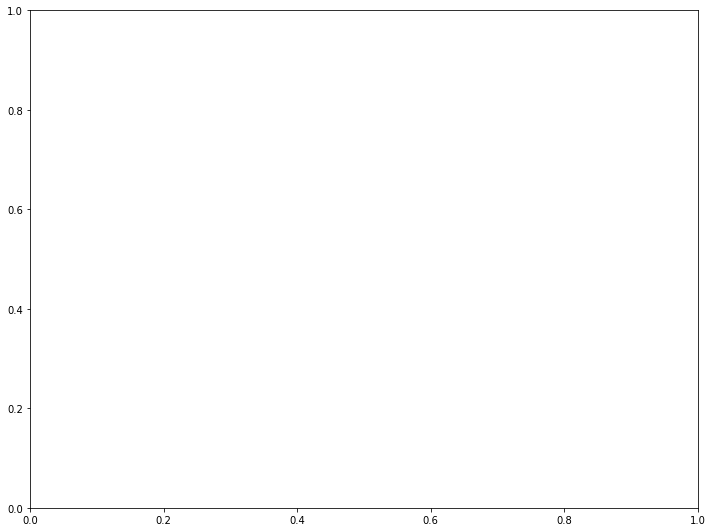

In [42]:
vPath = "3029469-hd_1920_1080_24fps.mp4";
yolov10n = YOLOv10.from_pretrained('jameslahm/yolov10n')
yolov10s = YOLOv10.from_pretrained('jameslahm/yolov10s')
yolov10m = YOLOv10.from_pretrained('jameslahm/yolov10m')
yolov10b = YOLOv10.from_pretrained('jameslahm/yolov10b')
yolov10l = YOLOv10.from_pretrained('jameslahm/yolov10l')
yolov10x = YOLOv10.from_pretrained('jameslahm/yolov10x')
yolov10DataN = getDataYolo(yolov10n,vPath,"YOLOv10n")
yolov10DataS = getDataYolo(yolov10n,vPath,"YOLOv10s")
yolov10DataM = getDataYolo(yolov10n,vPath,"YOLOv10m")
yolov10DataB = getDataYolo(yolov10n,vPath,"YOLOv10b")
yolov10DataL = getDataYolo(yolov10n,vPath,"YOLOv10l")
yolov10DataX = getDataYolo(yolov10n,vPath,"YOLOv10x")

In [52]:
import pandas as pd
def getPlot(index,title):
    plt.cla()
    data = pd.DataFrame(
        {
            "names":["yolov10DataN", "yolov10DataS", "yolov10DataM", "yolov10DataB", "yolov10DataL", "yolov10DataX"],
            "values":[np.mean(yolov10DataN[index]),np.mean(yolov10DataS[index]),np.mean(yolov10DataM[index]),np.mean(yolov10DataB[index]),np.mean(yolov10DataL[index]),np.mean(yolov10DataX[index])]
        }
    )
    data = data.sort_values("values")
    plt.title(title)
    plt.bar("names","values",data=data)
    plt.savefig(title+".jpg")
    return data

          names    values
5  yolov10DataX  1.105168
4  yolov10DataL  1.143272
0  yolov10DataN  1.167974
3  yolov10DataB  1.172309
1  yolov10DataS  1.192605
2  yolov10DataM  1.199198
          names    values
4  yolov10DataL  1.741836
5  yolov10DataX  1.750038
2  yolov10DataM  1.762448
1  yolov10DataS  1.775404
3  yolov10DataB  1.837698
0  yolov10DataN  1.859707
          names    values
5  yolov10DataX  7.241965
2  yolov10DataM  7.331464
3  yolov10DataB  7.426960
4  yolov10DataL  7.436482
1  yolov10DataS  7.535111
0  yolov10DataN  7.556038


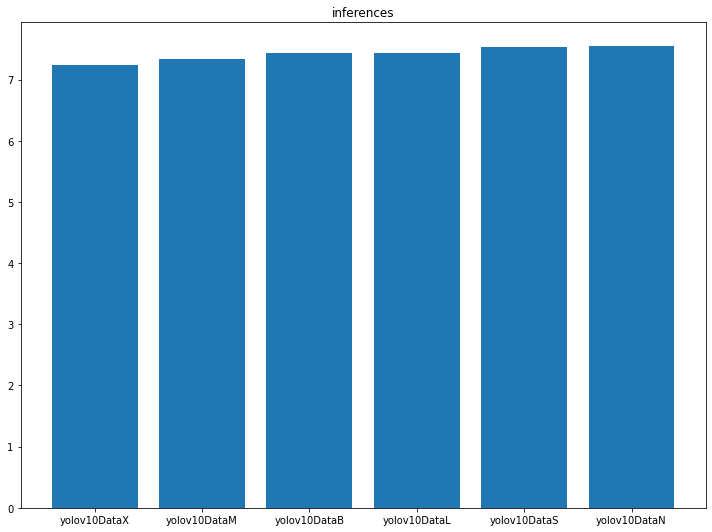

In [53]:
print(getPlot(0,"postprocess"))
print(getPlot(1,"preprocess"))
print(getPlot(2,"inferences"))

In [12]:
import cv2
import math 
import supervision as sv
cap = cv2.VideoCapture('http://192.168.100.52:4747/video')
i=0
import time

time.sleep(2.5)
count = 0
while i < 1000:
    r, f = cap.read()
    i+=1
    result_img, _ = predict_and_detect(model, f, classes=[], conf=0.5)
    cv2.imshow('IP Camera stream',f)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cap.release()
        cv2.destroyAllWindows()
# change input and class so the latency lower
# Deploy the code
        
# cv2.destroyAllWindows()
# while True:
#     success, image = cap.read()
#     # if not success:
#     #     break
#     cv2.imshow("frame",image)
    # result_img, _ = predict_and_detect(model, image, classes=[], conf=0.5)
# Cari cara biar matiin via keystroke


0: 480x640 (no detections), 30.3ms
Speed: 1.8ms preprocess, 30.3ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 41.0ms
Speed: 1.4ms preprocess, 41.0ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 25.9ms
Speed: 2.6ms preprocess, 25.9ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 24.5ms
Speed: 1.6ms preprocess, 24.5ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 25.8ms
Speed: 2.0ms preprocess, 25.8ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.9ms
Speed: 1.3ms preprocess, 9.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.2ms
Speed: 1.1ms preprocess, 9.2ms inferen

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'
